In [58]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [59]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs=np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [60]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [61]:
# Use the citipy module to determine city based on latitude and longitude.
%pip install citipy

from citipy import citipy

Note: you may need to restart the kernel to use updated packages.


In [62]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

619

In [63]:
#6.2.6 Get the City Weather Data


# Import the requests library.
import requests as req
# Import the API key.
from config import weather_api_key

In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [65]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [66]:
# Create an empty list to hold the weather data.
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retriebal")
print("-------------------------")
# Create counters.
record_count=1
set_count=1


Beginning Data Retriebal
-------------------------


In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lukulu
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mirnyy
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | san francisco
Processing Record 6 of Set 1 | inuvik
Processing Record 7 of Set 1 | barra da estiva
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | itaueira
Processing Record 15 of Set 1 | kropotkin
Processing Record 16 of Set 1 | victor harbor
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | konibodom
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | hobyo
Processing Record 22 of Set 1 | brigantine


Processing Record 35 of Set 4 | airai
Processing Record 36 of Set 4 | hambantota
Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | gold coast
Processing Record 40 of Set 4 | los andes
Processing Record 41 of Set 4 | bijawar
Processing Record 42 of Set 4 | shadrinsk
Processing Record 43 of Set 4 | labuhan
Processing Record 44 of Set 4 | zyryanka
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | gidole
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | mulanje
Processing Record 1 of Set 5 | marsh harbour
Processing Record 2 of Set 5 | tessalit
Processing Record 3 of Set 5 | kaabong
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | moyale
Processing Record 6 of Set 5 | knin
Processing Record 7 of Set 5 | nenjiang
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set

Processing Record 25 of Set 8 | poronaysk
Processing Record 26 of Set 8 | pangai
Processing Record 27 of Set 8 | the valley
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | anderson
Processing Record 30 of Set 8 | gazipur
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | suratgarh
Processing Record 33 of Set 8 | iguape
Processing Record 34 of Set 8 | zwedru
Processing Record 35 of Set 8 | penzance
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | jurm
Processing Record 38 of Set 8 | dwarka
Processing Record 39 of Set 8 | jijiang
Processing Record 40 of Set 8 | dutlwe
Processing Record 41 of Set 8 | canaries
Processing Record 42 of Set 8 | peebles
Processing Record 43 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 44 of Set 8 | nsanje
Processing Record 45 of Set 8 | paamiut
Processing Record 46 of Set 8 | kidal
Processing Record 47 of Set 8 | port hardy
Processing Record 48 of Set 8 | beloha
Pro

Processing Record 15 of Set 12 | montepuez
Processing Record 16 of Set 12 | urubicha
Processing Record 17 of Set 12 | indianola
Processing Record 18 of Set 12 | shache
Processing Record 19 of Set 12 | gopalpur
Processing Record 20 of Set 12 | coihaique
Processing Record 21 of Set 12 | popondetta
Processing Record 22 of Set 12 | huron
Processing Record 23 of Set 12 | rudnyy
Processing Record 24 of Set 12 | marzuq
Processing Record 25 of Set 12 | acara
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | naryan-mar
Processing Record 28 of Set 12 | synya
Processing Record 29 of Set 12 | anloga
Processing Record 30 of Set 12 | union city
Processing Record 31 of Set 12 | luderitz
Processing Record 32 of Set 12 | north bend
Processing Record 33 of Set 12 | san cristobal
Processing Record 34 of Set 12 | atambua
Processing Record 35 of Set 12 | grand gaube
Processing Record 36 of Set 12 | belvidere
Processing Record 37 of Set 12 | owen sound
Processing Record 38 of Set 12 | s

In [68]:
len(city_data)

575

In [69]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lukulu,-14.3707,23.2420,56.57,43,4,4.25,ZM,2021-07-19 20:30:14
1,Jamestown,42.0970,-79.2353,83.52,55,1,5.01,US,2021-07-19 20:26:45
2,Mirnyy,62.5353,113.9611,60.64,68,100,1.01,RU,2021-07-19 20:30:15
3,Albany,42.6001,-73.9662,79.41,80,99,1.21,US,2021-07-19 20:28:21
4,San Francisco,37.7749,-122.4194,96.89,66,20,4.00,US,2021-07-19 20:30:08
5,Inuvik,68.3499,-133.7218,74.26,77,40,4.61,CA,2021-07-19 20:30:15
6,Barra Da Estiva,-13.6261,-41.3269,69.40,39,0,1.77,BR,2021-07-19 20:30:15
7,Upernavik,72.7868,-56.1549,40.93,82,98,4.36,GL,2021-07-19 20:30:16
8,Ushuaia,-54.8000,-68.3000,42.46,70,40,4.61,AR,2021-07-19 20:28:38
9,Thompson,55.7435,-97.8558,68.16,37,40,5.75,CA,2021-07-19 20:30:16


In [74]:
 #Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [76]:
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lukulu,ZM,2021-07-19 20:30:14,-14.3707,23.2420,56.57,43,4,4.25
1,Jamestown,US,2021-07-19 20:26:45,42.0970,-79.2353,83.52,55,1,5.01
2,Mirnyy,RU,2021-07-19 20:30:15,62.5353,113.9611,60.64,68,100,1.01
3,Albany,US,2021-07-19 20:28:21,42.6001,-73.9662,79.41,80,99,1.21
4,San Francisco,US,2021-07-19 20:30:08,37.7749,-122.4194,96.89,66,20,4.00
...,...,...,...,...,...,...,...,...,...
570,Kibaya,TZ,2021-07-19 20:33:15,-5.3000,36.5667,55.96,62,63,6.64
571,Zhezkazgan,KZ,2021-07-19 20:33:15,47.8043,67.7144,74.30,52,100,6.71
572,Mackay,AU,2021-07-19 20:33:16,-21.1500,149.2000,53.04,93,5,5.75
573,Umarkot,PK,2021-07-19 20:33:16,25.3616,69.7362,83.89,75,100,24.14


In [77]:
#Create the output file(CSV).
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [81]:
# 6.3.1 Plot Latitude vs. Temperature

#Get Data for plotting
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


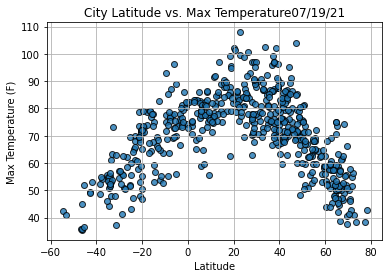

In [85]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature"+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

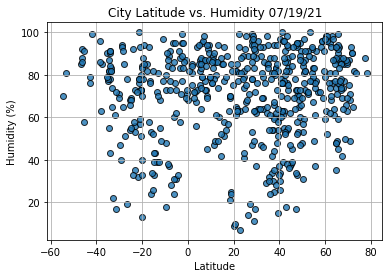

In [86]:
#6.3.2 Plot Latitude vs. Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

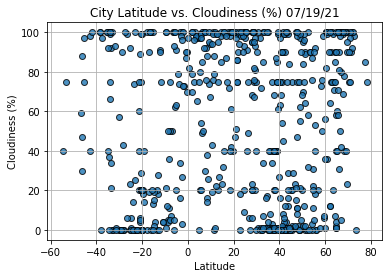

In [87]:
# 6.3.3 Plot Latitude vs. Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

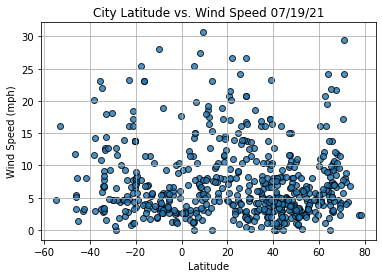

In [113]:
# 6.3.4 Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [114]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

 #Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
    regress_values=x_values*slope+intercept
# Get the equation of the line.
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

# Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()


In [115]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jamestown,US,2021-07-19 20:26:45,42.0970,-79.2353,83.52,55,1,5.01
2,Mirnyy,RU,2021-07-19 20:30:15,62.5353,113.9611,60.64,68,100,1.01
3,Albany,US,2021-07-19 20:28:21,42.6001,-73.9662,79.41,80,99,1.21
4,San Francisco,US,2021-07-19 20:30:08,37.7749,-122.4194,96.89,66,20,4.00
5,Inuvik,CA,2021-07-19 20:30:15,68.3499,-133.7218,74.26,77,40,4.61


In [116]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

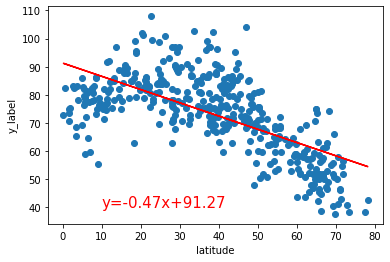

In [124]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


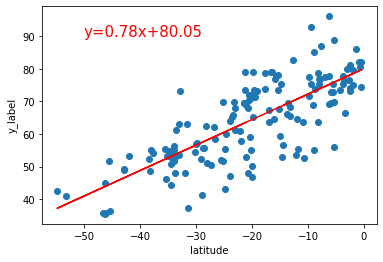

In [122]:
#Perform Linear Regression on the Maximum Temperature for the southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature','Max Temp',(-50,90))

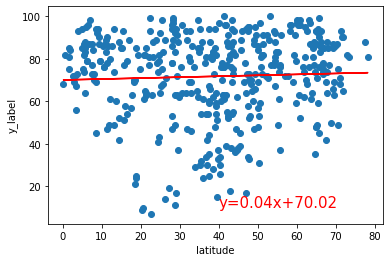

In [129]:
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northem Hemisphere\ for %humidity','%Humidity',(40,10))

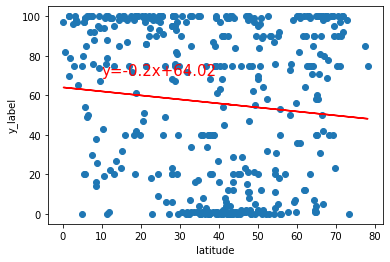

In [136]:
#6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northem Hemisphere\ for %Cloudiness','%Cloudiness',(10,70))


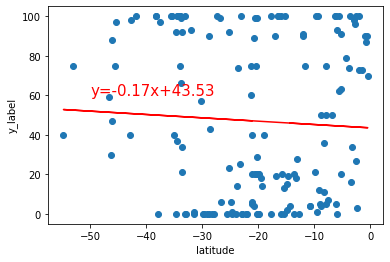

In [138]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


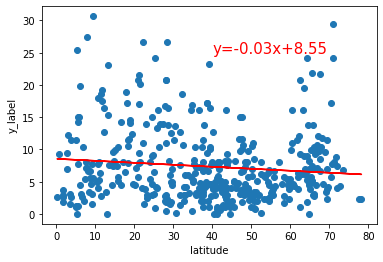

In [148]:
#Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values,y_values,'Linear Regression on the Nothern Hemisphere\ for Wind Speed','Wind Speed',(40,25))


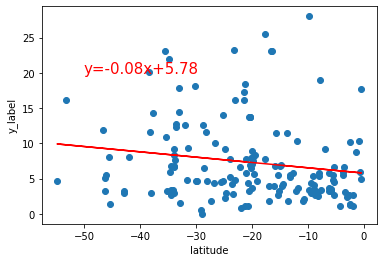

In [151]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))
